In [ ]:
import numpy
from numpy.random import seed
seed(0)
import numpy as np
import tensorflow as tf
from tensorflow import keras
from IPython.display import Image
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D,BatchNormalization
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint
import pandas as pd
import keras.backend as K
import cv2

In [ ]:
# Load the dataset
data_path = '/content/drive/MyDrive/Phd_Data_set_Implementation/Aug-Training-four'

train_datagen = ImageDataGenerator(rescale=1./255)
train_datagenerator = train_datagen.flow_from_directory(
    data_path,
    target_size=(32, 32),
    class_mode='categorical',
    batch_size=32
)

Found 9645 images belonging to 4 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal',input_shape=(32,32,3)))
model.add(Conv2D(128, kernel_size=(3, 3),activation='relu',kernel_initializer='he_normal'))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.20))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Conv2D(64, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(32, (3, 3), activation='relu',padding='same',kernel_initializer='he_normal'))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(4, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 128)       3584      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 128)       147584    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 128)       0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        73792     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
test_data_path = '/content/drive/MyDrive/Phd_Data_set_Implementation/TESTING-FOUR-CLASSES-by-dec20'

test_datagen = ImageDataGenerator(rescale=1./255)
test_datagenerator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(32, 32),
    class_mode='categorical',
    batch_size=32
)

Found 45 images belonging to 4 classes.


In [ ]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        # print('Accuracy:', logs.get('accuracy', 0))
        if logs.get('accuracy') >= 0.95:
            # print('inside if')
            self.model.stop_training = True

callback = MyCallback()

In [ ]:
model.fit(train_datagenerator,epochs=150,validation_data=test_datagenerator,steps_per_epoch=16, callbacks=[callback])

Epoch 1/150
16/16 [==============================] - 413s 24s/step - loss: 1.9457 - accuracy: 0.2761 - val_loss: 5.5053 - val_accuracy: 0.2222
Epoch 2/150
16/16 [==============================] - 354s 22s/step - loss: 1.8316 - accuracy: 0.2712 - val_loss: 3.9325 - val_accuracy: 0.2667
Epoch 3/150
16/16 [==============================] - 328s 21s/step - loss: 1.9263 - accuracy: 0.2809 - val_loss: 3.6436 - val_accuracy: 0.1556
Epoch 4/150
16/16 [==============================] - 310s 19s/step - loss: 1.7756 - accuracy: 0.2606 - val_loss: 4.0445 - val_accuracy: 0.2222
Epoch 5/150
16/16 [==============================] - 293s 18s/step - loss: 1.5438 - accuracy: 0.3401 - val_loss: 2.9776 - val_accuracy: 0.3333
Epoch 6/150
16/16 [==============================] - 265s 17s/step - loss: 1.4957 - accuracy: 0.3518 - val_loss: 2.5734 - val_accuracy: 0.3333
Epoch 7/150
16/16 [==============================] - 254s 16s/step - loss: 1.6024 - accuracy: 0.2871 - val_loss: 2.0939 - val_accuracy: 0.3333

In [ ]:
layer_outputs = [layer.output for layer in model.layers[:-5]] 

In [ ]:

layer_outputs

[<KerasTensor: shape=(None, 30, 30, 128) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 28, 28, 128) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 14, 14, 128) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 14, 14, 128) dtype=float32 (created by layer 'dropout')>,
 <KerasTensor: shape=(None, 14, 14, 64) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 14, 14, 64) dtype=float32 (created by layer 'conv2d_3')>,
 <KerasTensor: shape=(None, 7, 7, 64) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 7, 7, 64) dtype=float32 (created by layer 'dropout_1')>,
 <KerasTensor: shape=(None, 7, 7, 32) dtype=float32 (created by layer 'conv2d_4')>,
 <KerasTensor: shape=(None, 7, 7, 32) dtype=float32 (created by layer 'dropout_2')>]

In [ ]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

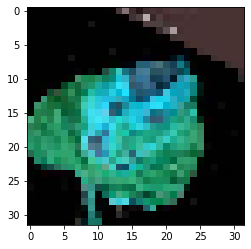

(1, 32, 32, 3)


In [ ]:
img = keras.preprocessing.image.load_img('/content/drive/MyDrive/Phd_Data_set_Implementation/Aug-Training-four/EL/HL_0_1004.jpeg',target_size=(32,32,3))
img = keras.preprocessing.image.img_to_array(img)
array=keras.preprocessing.image.img_to_array(img)
array=np.expand_dims(array,axis=0)
img_tensor = array
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

In [ ]:
model.predict(img_tensor)

array([[3.4427496e-05, 9.9902892e-01, 6.6649790e-08, 9.3662401e-04]],
      dtype=float32)

In [ ]:
activations = activation_model.predict(img_tensor) 
last_layer_activation = activations[8]
print(last_layer_activation.shape)

(1, 7, 7, 32)


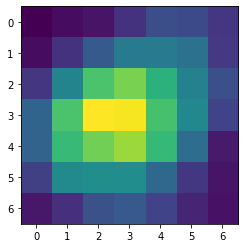

In [ ]:
heatmap = np.mean(last_layer_activation, axis=-1)
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
plt.imshow(heatmap[0])

In [ ]:
heatmap=heatmap[0,:,:,]
heatmap.shape

(7, 7)

In [ ]:

eps = K.epsilon()
for i in range(len(last_layer_activation[0])):
  for j in range(len(last_layer_activation[0][i])):
    for k in range(len(last_layer_activation[0][i][j])):
      if last_layer_activation[0][i][j][k]==0.:
        last_layer_activation[0][i][j][k]=eps

In [ ]:
last_layer_activation

array([[[[1.0000000e-07, 1.0000000e-07, 1.0000000e-07, ...,
          1.0000000e-07, 1.0000000e-07, 1.0000000e-07],
         [1.0000000e-07, 1.0000000e-07, 1.0000000e-07, ...,
          1.0000000e-07, 1.0000000e-07, 1.0000000e-07],
         [2.4352792e-01, 1.0000000e-07, 1.0000000e-07, ...,
          1.0000000e-07, 1.0000000e-07, 1.0000000e-07],
         ...,
         [3.6302366e+00, 1.0000000e-07, 1.0000000e-07, ...,
          1.0000000e-07, 1.0000000e-07, 1.0000000e-07],
         [4.0712371e+00, 1.0000000e-07, 1.0000000e-07, ...,
          1.0000000e-07, 1.0000000e-07, 1.0000000e-07],
         [2.3455846e+00, 1.0000000e-07, 1.0000000e-07, ...,
          1.0000000e-07, 1.0000000e-07, 1.0000000e-07]],

        [[1.0000000e-07, 1.0000000e-07, 1.0000000e-07, ...,
          1.0000000e-07, 1.0000000e-07, 1.0000000e-07],
         [1.0000000e-07, 1.0000000e-07, 1.0000000e-07, ...,
          1.0000000e-07, 1.0000000e-07, 1.0000000e-07],
         [2.7498734e+00, 1.0000000e-07, 1.0000000e-07, .

In [ ]:
image_final=np.zeros_like(img_tensor)
activations_final = activation_model.predict(image_final)

In [ ]:
activations_final

[array([[[[0.        , 0.07686652, 0.        , ..., 0.07932793,
           0.00652802, 0.05265252],
          [0.        , 0.07686652, 0.        , ..., 0.07932793,
           0.00652802, 0.05265252],
          [0.        , 0.07686652, 0.        , ..., 0.07932793,
           0.00652802, 0.05265252],
          ...,
          [0.        , 0.07686652, 0.        , ..., 0.07932793,
           0.00652802, 0.05265252],
          [0.        , 0.07686652, 0.        , ..., 0.07932793,
           0.00652802, 0.05265252],
          [0.        , 0.07686652, 0.        , ..., 0.07932793,
           0.00652802, 0.05265252]],
 
         [[0.        , 0.07686652, 0.        , ..., 0.07932793,
           0.00652802, 0.05265252],
          [0.        , 0.07686652, 0.        , ..., 0.07932793,
           0.00652802, 0.05265252],
          [0.        , 0.07686652, 0.        , ..., 0.07932793,
           0.00652802, 0.05265252],
          ...,
          [0.        , 0.07686652, 0.        , ..., 0.07932793,
   

In [ ]:
last_layer_activation_final = activations_final[8]
print(last_layer_activation_final.shape)

(1, 7, 7, 32)


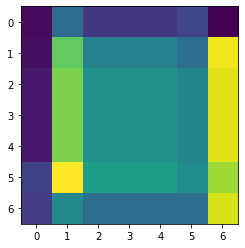

In [ ]:
heatmap_final = np.mean(last_layer_activation_final, axis=-1)
heatmap_final = np.maximum(heatmap_final, 0) / np.max(heatmap_final)
plt.imshow(heatmap_final[0])

In [ ]:
print(last_layer_activation.shape,last_layer_activation_final.shape)

(1, 7, 7, 32) (1, 7, 7, 32)


In [ ]:
weights_ratio=(last_layer_activation-last_layer_activation_final)/last_layer_activation

In [ ]:
weights_ratio

array([[[[ 1.0000000e+00,  1.0000000e+00,  1.0000000e+00, ...,
           1.0000000e+00,  1.0000000e+00, -6.2151106e+05],
         [ 1.0000000e+00,  1.0000000e+00,  1.0000000e+00, ...,
           1.0000000e+00,  1.0000000e+00, -2.5134648e+05],
         [ 1.0000000e+00,  1.0000000e+00,  1.0000000e+00, ...,
           1.0000000e+00,  1.0000000e+00,  1.0000000e+00],
         ...,
         [ 1.0000000e+00,  1.0000000e+00,  1.0000000e+00, ...,
           1.0000000e+00,  1.0000000e+00,  1.0000000e+00],
         [ 1.0000000e+00,  1.0000000e+00,  1.0000000e+00, ...,
           1.0000000e+00,  1.0000000e+00, -1.3503228e+06],
         [ 1.0000000e+00,  1.0000000e+00,  1.0000000e+00, ...,
           1.0000000e+00,  1.0000000e+00,  1.0000000e+00]],

        [[ 1.0000000e+00,  1.0000000e+00,  1.0000000e+00, ...,
           1.0000000e+00, -1.7394619e+05,  1.0000000e+00],
         [ 1.0000000e+00,  1.0000000e+00,  1.0000000e+00, ...,
           1.0000000e+00,  1.0000000e+00,  1.0000000e+00],
        

In [ ]:
# Multipling the weight ratio with final activation layer
for i in range(len(last_layer_activation[0])):
  for j in range(len(last_layer_activation[0][i])):
    last_layer_activation[0][i][j]=(last_layer_activation[0][i][j]*weights_ratio[0][i][j])

In [ ]:
for i in range(len(last_layer_activation[0])):
  for j in range(len(last_layer_activation[0][i])):
    for k in range(len(last_layer_activation[0][i][j])):
      if last_layer_activation[0][i][j][k]<0.:
        last_layer_activation[0][i][j][k]=0.
last_layer_activation

array([[[[1.0000000e-07, 1.0000000e-07, 1.0000000e-07, ...,
          1.0000000e-07, 1.0000000e-07, 0.0000000e+00],
         [1.0000000e-07, 1.0000000e-07, 1.0000000e-07, ...,
          1.0000000e-07, 1.0000000e-07, 0.0000000e+00],
         [2.4352792e-01, 1.0000000e-07, 1.0000000e-07, ...,
          1.0000000e-07, 1.0000000e-07, 1.0000000e-07],
         ...,
         [3.6302366e+00, 1.0000000e-07, 1.0000000e-07, ...,
          1.0000000e-07, 1.0000000e-07, 1.0000000e-07],
         [4.0712371e+00, 1.0000000e-07, 1.0000000e-07, ...,
          1.0000000e-07, 1.0000000e-07, 0.0000000e+00],
         [2.3455846e+00, 1.0000000e-07, 1.0000000e-07, ...,
          1.0000000e-07, 1.0000000e-07, 1.0000000e-07]],

        [[1.0000000e-07, 1.0000000e-07, 1.0000000e-07, ...,
          1.0000000e-07, 0.0000000e+00, 1.0000000e-07],
         [1.0000000e-07, 1.0000000e-07, 1.0000000e-07, ...,
          1.0000000e-07, 1.0000000e-07, 1.0000000e-07],
         [2.7498734e+00, 1.0000000e-07, 1.0000000e-07, .

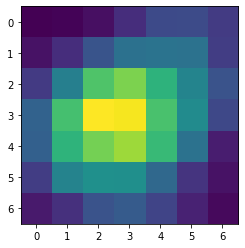

In [ ]:
heatmap = np.mean(last_layer_activation, axis=-1)
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
plt.imshow(heatmap[0])
plt.savefig("heatmap.jpg")
heatmap=heatmap[0,:,:,]

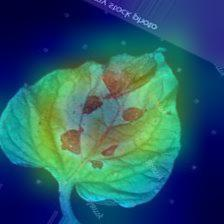

In [ ]:
img = keras.preprocessing.image.load_img('/content/drive/MyDrive/Phd_Data_set_Implementation/Aug-Training-four/EL/HL_0_1004.jpeg')
img = keras.preprocessing.image.img_to_array(img)
heatmap = np.uint8(255 * heatmap)
jet = cm.get_cmap("jet")
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)
superimposed_img = jet_heatmap * 0.7 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
save_path = "final_image_leaf.jpg"
superimposed_img.save(save_path)
display(Image(save_path))

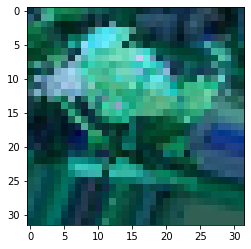

(1, 32, 32, 3)
(1, 7, 7, 32)


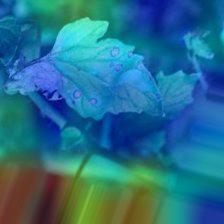

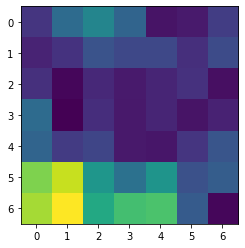

In [ ]:
img = keras.preprocessing.image.load_img('/content/drive/MyDrive/Phd_Data_set_Implementation/Aug-Training-four/BL/HL_0_1007.jpeg',target_size=(32,32,3))
img = keras.preprocessing.image.img_to_array(img)
array=keras.preprocessing.image.img_to_array(img)
array=np.expand_dims(array,axis=0)
img_tensor = array
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

model.predict(img_tensor)

activations = activation_model.predict(img_tensor) 
last_layer_activation = activations[8]
print(last_layer_activation.shape)

heatmap = np.mean(last_layer_activation, axis=-1)
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
plt.imshow(heatmap[0])
heatmap=heatmap[0,:,:,]

eps = K.epsilon()
for i in range(len(last_layer_activation[0])):
  for j in range(len(last_layer_activation[0][i])):
    for k in range(len(last_layer_activation[0][i][j])):
      if last_layer_activation[0][i][j][k]==0.:
        last_layer_activation[0][i][j][k]=eps

image_final=np.zeros_like(img_tensor)
activations_final = activation_model.predict(image_final) 

last_layer_activation_final = activations_final[8]

heatmap_final = np.mean(last_layer_activation_final, axis=-1)
heatmap_final = np.maximum(heatmap_final, 0) / np.max(heatmap_final)
plt.imshow(heatmap_final[0])

weights_ratio=(last_layer_activation-last_layer_activation_final)/last_layer_activation

for i in range(len(last_layer_activation[0])):
  for j in range(len(last_layer_activation[0][i])):
    last_layer_activation[0][i][j]=(last_layer_activation[0][i][j]*weights_ratio[0][i][j])

for i in range(len(last_layer_activation[0])):
  for j in range(len(last_layer_activation[0][i])):
    for k in range(len(last_layer_activation[0][i][j])):
      if last_layer_activation[0][i][j][k]<0.:
        last_layer_activation[0][i][j][k]=0.

heatmap = np.mean(last_layer_activation, axis=-1)
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
plt.imshow(heatmap[0])
plt.savefig("heatmap_bl_leaf_1007.jpg")
heatmap=heatmap[0,:,:,]

img = keras.preprocessing.image.load_img('/content/drive/MyDrive/Phd_Data_set_Implementation/Aug-Training-four/BL/HL_0_1007.jpeg')
img = keras.preprocessing.image.img_to_array(img)
heatmap = np.uint8(255 * heatmap)
jet = cm.get_cmap("jet")
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)
superimposed_img = jet_heatmap * 0.7 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
save_path = "final_image_bl_lraf_1007.jpg"
superimposed_img.save(save_path)
display(Image(save_path))

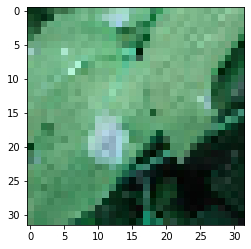

(1, 32, 32, 3)
(1, 7, 7, 32)


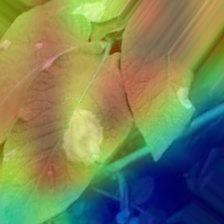

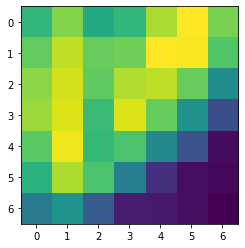

In [ ]:
img = keras.preprocessing.image.load_img('/content/drive/MyDrive/Phd_Data_set_Implementation/Aug-Training-four/BL/HL_0_1239.jpeg',target_size=(32,32,3))
img = keras.preprocessing.image.img_to_array(img)
array=keras.preprocessing.image.img_to_array(img)
array=np.expand_dims(array,axis=0)
img_tensor = array
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

model.predict(img_tensor)

activations = activation_model.predict(img_tensor) 
last_layer_activation = activations[8]
print(last_layer_activation.shape)

heatmap = np.mean(last_layer_activation, axis=-1)
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
plt.imshow(heatmap[0])
heatmap=heatmap[0,:,:,]

eps = K.epsilon()
for i in range(len(last_layer_activation[0])):
  for j in range(len(last_layer_activation[0][i])):
    for k in range(len(last_layer_activation[0][i][j])):
      if last_layer_activation[0][i][j][k]==0.:
        last_layer_activation[0][i][j][k]=eps

image_final=np.zeros_like(img_tensor)
activations_final = activation_model.predict(image_final) 

last_layer_activation_final = activations_final[8]

heatmap_final = np.mean(last_layer_activation_final, axis=-1)
heatmap_final = np.maximum(heatmap_final, 0) / np.max(heatmap_final)
plt.imshow(heatmap_final[0])

weights_ratio=(last_layer_activation-last_layer_activation_final)/last_layer_activation

for i in range(len(last_layer_activation[0])):
  for j in range(len(last_layer_activation[0][i])):
    last_layer_activation[0][i][j]=(last_layer_activation[0][i][j]*weights_ratio[0][i][j])

for i in range(len(last_layer_activation[0])):
  for j in range(len(last_layer_activation[0][i])):
    for k in range(len(last_layer_activation[0][i][j])):
      if last_layer_activation[0][i][j][k]<0.:
        last_layer_activation[0][i][j][k]=0.

heatmap = np.mean(last_layer_activation, axis=-1)
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
plt.imshow(heatmap[0])
plt.savefig("heatmap_hl_1239.jpg")
heatmap=heatmap[0,:,:,]

img = keras.preprocessing.image.load_img('/content/drive/MyDrive/Phd_Data_set_Implementation/Aug-Training-four/BL/HL_0_1239.jpeg')
img = keras.preprocessing.image.img_to_array(img)
heatmap = np.uint8(255 * heatmap)
jet = cm.get_cmap("jet")
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)
superimposed_img = jet_heatmap * 0.7 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
save_path = "final_image_bl_hl_0_1239.jpg"
superimposed_img.save(save_path)
display(Image(save_path))

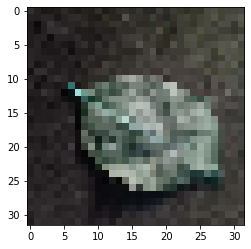

(1, 32, 32, 3)
(1, 7, 7, 32)


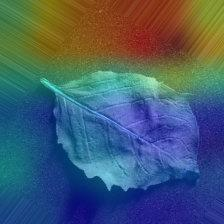

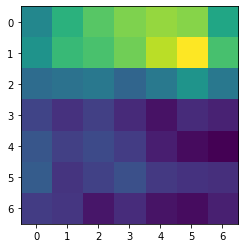

In [ ]:
img = keras.preprocessing.image.load_img('/content/drive/MyDrive/Phd_Data_set_Implementation/Aug-Training-four/HL/HL_0_1088.jpeg',target_size=(32,32,3))
img = keras.preprocessing.image.img_to_array(img)
array=keras.preprocessing.image.img_to_array(img)
array=np.expand_dims(array,axis=0)
img_tensor = array
img_tensor /= 255.
plt.imshow(img_tensor[0])
plt.show()
print(img_tensor.shape)

model.predict(img_tensor)

activations = activation_model.predict(img_tensor) 
last_layer_activation = activations[8]
print(last_layer_activation.shape)

heatmap = np.mean(last_layer_activation, axis=-1)
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
plt.imshow(heatmap[0])
heatmap=heatmap[0,:,:,]

eps = K.epsilon()
for i in range(len(last_layer_activation[0])):
  for j in range(len(last_layer_activation[0][i])):
    for k in range(len(last_layer_activation[0][i][j])):
      if last_layer_activation[0][i][j][k]==0.:
        last_layer_activation[0][i][j][k]=eps

image_final=np.zeros_like(img_tensor)
activations_final = activation_model.predict(image_final) 

last_layer_activation_final = activations_final[8]

heatmap_final = np.mean(last_layer_activation_final, axis=-1)
heatmap_final = np.maximum(heatmap_final, 0) / np.max(heatmap_final)
plt.imshow(heatmap_final[0])

weights_ratio=(last_layer_activation-last_layer_activation_final)/last_layer_activation

for i in range(len(last_layer_activation[0])):
  for j in range(len(last_layer_activation[0][i])):
    last_layer_activation[0][i][j]=(last_layer_activation[0][i][j]*weights_ratio[0][i][j])

for i in range(len(last_layer_activation[0])):
  for j in range(len(last_layer_activation[0][i])):
    for k in range(len(last_layer_activation[0][i][j])):
      if last_layer_activation[0][i][j][k]<0.:
        last_layer_activation[0][i][j][k]=0.

heatmap = np.mean(last_layer_activation, axis=-1)
heatmap = np.maximum(heatmap, 0) / np.max(heatmap)
plt.imshow(heatmap[0])
plt.savefig("heatmap_hl.jpg")
heatmap=heatmap[0,:,:,]

img = keras.preprocessing.image.load_img('/content/drive/MyDrive/Phd_Data_set_Implementation/Aug-Training-four/HL/HL_0_1088.jpeg')
img = keras.preprocessing.image.img_to_array(img)
heatmap = np.uint8(255 * heatmap)
jet = cm.get_cmap("jet")
jet_colors = jet(np.arange(256))[:, :3]
jet_heatmap = jet_colors[heatmap]
jet_heatmap = keras.preprocessing.image.array_to_img(jet_heatmap)
jet_heatmap = jet_heatmap.resize((img.shape[1], img.shape[0]))
jet_heatmap = keras.preprocessing.image.img_to_array(jet_heatmap)
superimposed_img = jet_heatmap * 0.7 + img
superimposed_img = keras.preprocessing.image.array_to_img(superimposed_img)
save_path = "final_image_hl_1088.jpg"
superimposed_img.save(save_path)
display(Image(save_path))